# Green Card (Permanent Residence) Entitlements in USA in 2016

### Oktay Ekici

### January 2019

### BDA 507 Intro to Programming for Big Data (Python)  - Term Project.

# A. Introduction

## The Data

I have chosen the data of Green Card (Permanent Residence) entitlements of USA which is hosted by kaggle.com . The data presents us the permanent residence applications that have been made in to work&live in USA. This Permanent Residence green card should not be confused with the lottery draw (a.k.a. Green card known world-wide)The dataset includes informations of applications containing the dates of application, employer name and information, the job positions and salaries of applicants, the education level of the applicants, citizenship information etc. The datasets include information of decided applications in the fiscal year of 2016. We will try to understand the main purpose Green Card programme with detailed analysis and if it affects the brain drain world wide.

# B. Exploratory Data Analysis

Let's import our packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

read data from excel files

In [2]:
os.chdir("C:\\Users\\oktay\\PycharmProjects\\greencard") 
greencard15 = pd.read_excel("PERM_Disclosure_Data_FY15_Q4.xlsx")
greencard16 = pd.read_excel("PERM_Disclosure_Data_FY16.xlsx")
greencard17 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")
greencard18 = pd.read_excel("PERM_Disclosure_Data_FY2018_Q4_EOY.xlsx")


## Exploring the Data

Renaming our non-consistent column names with the consistent ones.

In [3]:
greencard15=greencard15.rename(columns = {'JI_OFFERED_TO_SEC_J_FOREIGN_WORKER':'JI_OFFERED_TO_SEC_J_FW'})
greencard15=greencard15.rename(columns = {'JI_FOREIGN_WORKER_LIVE_ON_PREMISES':'JI_FW_LIVE_ON_PREMISES'})
greencard15=greencard15.rename(columns = {'REC_INFO_BARG_REP_NOTIFIED':'RECR_INFO_BARG_REP_NOTIFIED'})
greencard15=greencard15.rename(columns = {'PW_Job_Title_9089':'PW_JOB_TITLE_9089'})
greencard16=greencard16.rename(columns = {'PW_Job_Title_9089':'PW_JOB_TITLE_9089'})
greencard16=greencard16.rename(columns = {'FW_INFO_REL_OCCUP_EXPERIENCE':'FW_INFO_REL_OCCUP_EXP'})
greencard18=greencard18.rename(columns = {'JOB_INFO_TRANING_NUM_MONTHS':'JOB_INFO_TRAINING_NUM_MONTHS'})

In [4]:
print("greencard 15: ",greencard15.shape[0], "rows,", greencard15.shape[1], "columns")
print("greencard 16: ",greencard16.shape[0], "rows,", greencard16.shape[1], "columns")
print("greencard 17: ",greencard17.shape[0], "rows,", greencard17.shape[1], "columns")
print("greencard 18: ",greencard18.shape[0], "rows,", greencard18.shape[1], "columns")
print("total: ",greencard18.shape[0]+greencard17.shape[0]+greencard16.shape[0]+greencard15.shape[0], "rows,", greencard18.shape[1], "columns")

greencard 15:  89299 rows, 125 columns
greencard 16:  126143 rows, 125 columns
greencard 17:  97603 rows, 125 columns
greencard 18:  119776 rows, 125 columns
total:  432821 rows, 125 columns


There are 432.821 rows and 125 columns.

We will add year information for each year's data:

In [5]:
greencard15.insert(0, "year", "2015")

In [6]:
greencard16.insert(0, "year", "2016")

In [7]:
greencard17.insert(0, "year", "2017")

In [8]:
greencard18.insert(0, "year", "2018")

Now let's consolidate the data of all years.

In [11]:
greencard = pd.concat([greencard15, greencard16, greencard17, greencard18], ignore_index=True, sort=False)

In [12]:
print("greencard: ",greencard.shape[0], "rows,", greencard.shape[1], "columns") 

greencard:  432821 rows, 126 columns


## Arrangement of the Data

Now we're trying to make the data more readable.

In [13]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('CALIFORNIA', 'CA')

In [14]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('ALABAMA', 'AL')

In [15]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('ALASKA', 'AK')

In [16]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('ARIZONA', 'AZ')

In [17]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('ARKANSAS', 'AR')

In [18]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('COLORADO', 'CO')

In [19]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('CONNECTICUT', 'CT')

In [20]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('DELAWARE', 'DE')

In [21]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('DISTRICT OF COLUMBIA', 'DC')

In [22]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('FLORIDA', 'FL')

In [23]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('GEORGIA', 'GA')

In [24]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('GUAM', 'GU')

In [25]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('HAWAII', 'HI')

In [26]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('IDAHO', 'ID')

In [27]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('ILLINOIS', 'IL')

In [28]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('INDIANA', 'IN')

In [29]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('IOWA', 'IA')

In [30]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('KANSAS', 'KS')

In [31]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('KENTUCKY', 'KY')

In [32]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('LOUISIANA', 'LA')

In [33]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MAINE', 'ME')

In [34]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MARYLAND', 'MD')

In [35]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MASSACHUSETTS', 'MA')

In [36]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MICHIGAN', 'MI')

In [37]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MINNESOTA', 'MN')

In [38]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MISSISSIPPI', 'MS')

In [39]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MISSOURI', 'MO')

In [40]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('MONTANA', 'MT')

In [41]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NEBRASKA', 'NE')

In [42]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NEVADA', 'NV')

In [43]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NEW HAMPSHIRE', 'NH')

In [44]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NEW JERSEY', 'NJ')

In [45]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NEW MEXICO', 'NM')

In [46]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NEW YORK', 'NY')

In [47]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NORTH CAROLINA', 'NC')

In [48]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('NORTH DAKOTA', 'ND')

In [49]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('OKLAHOMA', 'OK')

In [50]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('OHIO', 'OH')

In [51]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('OREGON', 'OR')

In [52]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('PENNSYLVANIA', 'PA')

In [53]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('RHODE ISLAND', 'RI')

In [54]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('SOUTH CAROLINA', 'SC')

In [55]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('SOUTH DAKOTA', 'SD')

In [56]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('TENNESSEE', 'TN')

In [57]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('TEXAS', 'TX')

In [58]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('UTAH', 'UT')

In [59]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('VERMONT', 'VT')

In [60]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('VIRGINIA', 'VA')

In [61]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('WASHINGTON', 'WA')

In [62]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('WEST VIRGINIA', 'WV')

In [63]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('WISCONSIN', 'WI')

In [64]:
greencard['JOB_INFO_WORK_STATE'] = greencard['JOB_INFO_WORK_STATE'].replace('WYOMING', 'WY')

In [78]:
greencard['JOB_INFO_JOB_TITLE'] = greencard['JOB_INFO_JOB_TITLE'].replace('SOFTWARE ENGINEER', 'Software Engineer')

In [65]:
list(greencard)

['year',
 'CASE_NUMBER',
 'DECISION_DATE',
 'CASE_STATUS',
 'CASE_RECEIVED_DATE',
 'REFILE',
 'ORIG_FILE_DATE',
 'ORIG_CASE_NO',
 'SCHD_A_SHEEPHERDER',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS_1',
 'EMPLOYER_ADDRESS_2',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_COUNTRY',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_PHONE',
 'EMPLOYER_PHONE_EXT',
 'EMPLOYER_NUM_EMPLOYEES',
 'EMPLOYER_YR_ESTAB',
 'FW_OWNERSHIP_INTEREST',
 'AGENT_FIRM_NAME',
 'AGENT_CITY',
 'AGENT_STATE',
 'PW_TRACK_NUM',
 'PW_SOC_CODE',
 'PW_SOC_TITLE',
 'PW_LEVEL_9089',
 'PW_AMOUNT_9089',
 'PW_UNIT_OF_PAY_9089',
 'PW_SOURCE_NAME_9089',
 'PW_SOURCE_NAME_OTHER_9089',
 'PW_DETERM_DATE',
 'PW_EXPIRE_DATE',
 'WAGE_OFFER_FROM_9089',
 'WAGE_OFFER_TO_9089',
 'WAGE_OFFER_UNIT_OF_PAY_9089',
 'JOB_INFO_WORK_CITY',
 'JOB_INFO_WORK_STATE',
 'JOB_INFO_WORK_POSTAL_CODE',
 'JOB_INFO_JOB_TITLE',
 'JOB_INFO_EDUCATION',
 'JOB_INFO_EDUCATION_OTHER',
 'JOB_INFO_MAJOR',
 'JOB_INFO_TRAINING',
 'JOB_INFO_TRAINING_NUM_MONTHS',
 'JOB_INFO_TRAINING_FIEL

Dataframe to csv conversion

let's save the consolidated data to a csv file.

In [66]:
greencard.to_csv('greencardconsolidated.csv', sep='\t', encoding='utf-8')

## Analyzing and Visualizing the Data

Which countries the most applications are from? Let's see the Top 20!

In [67]:
greencard['COUNTRY_OF_CITIZENSHIP'].value_counts()[:20]

INDIA             229167
CHINA              39302
SOUTH KOREA        28793
CANADA             15516
MEXICO             11663
PHILIPPINES         7528
VIETNAM             5898
UNITED KINGDOM      5124
TAIWAN              4656
BRAZIL              4509
PAKISTAN            4385
VENEZUELA           3704
FRANCE              3676
NEPAL               3460
IRAN                3430
JAPAN               3063
RUSSIA              2957
TURKEY              2784
GERMANY             2512
ITALY               2357
Name: COUNTRY_OF_CITIZENSHIP, dtype: int64

Same information in plot:

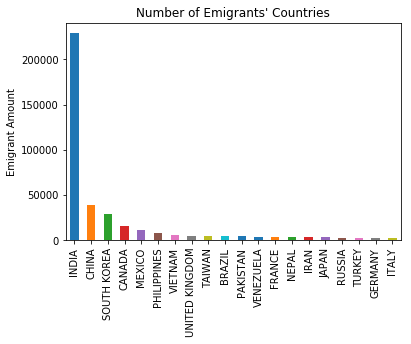

In [68]:
greencard['COUNTRY_OF_CITIZENSHIP'].value_counts()[:20].plot(kind='bar', rot=90)
plt.ylabel('Emigrant Amount')
plt.title("Number of Emigrants' Countries")
plt.show()

As you can see, India dominates the applications, followed by China, South Korea and Canada. Now let's see the distribution of cities where most immigrants move in.

Let's see the most preferred city

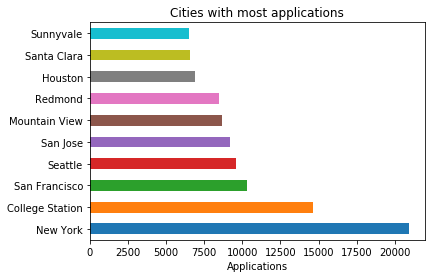

In [69]:
greencard['JOB_INFO_WORK_CITY'].value_counts()[:10].plot(kind='barh', rot=0)
plt.xlabel('Applications')
plt.title("Cities with most applications")
plt.show()

Great! New York leads as expected. And how about the states? Which state is the one with most applications?

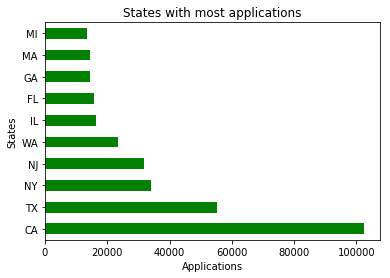

In [70]:
greencard['JOB_INFO_WORK_STATE'].value_counts()[:10].plot(kind='barh', rot=0, color="green")
plt.xlabel('Applications')
plt.ylabel('States')
plt.title("States with most applications")
plt.show()

Yaay California Republic!! (which I love the most amongst them). Can it be an effect of Silicon Valley? Let's see the employers who apply for the most greencards for their pre-employees:

In [71]:
greencard_most = greencard.JOB_INFO_WORK_STATE == 'CA'
green_ca = greencard[greencard_most]  # We assigned the Californian applications to green_ca

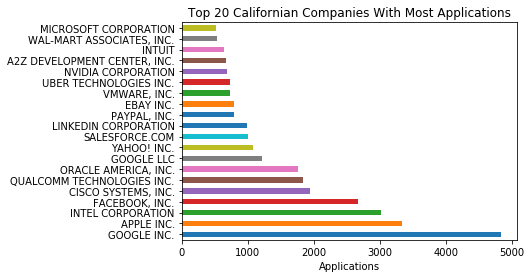

In [72]:
green_ca['EMPLOYER_NAME'].value_counts()[:20].plot(kind='barh', rot=0)
plt.xlabel('Applications')
plt.title("Top 20 Californian Companies With Most Applications")
plt.show()

The companies with most applications in California:

In [73]:
green_ca['EMPLOYER_NAME'].value_counts()[:10]

GOOGLE INC.                   4827
APPLE INC.                    3330
INTEL CORPORATION             3016
FACEBOOK, INC.                2662
CISCO SYSTEMS, INC.           1935
QUALCOMM TECHNOLOGIES INC.    1827
ORACLE AMERICA, INC.          1758
GOOGLE LLC                    1220
YAHOO! INC.                   1083
SALESFORCE.COM                 996
Name: EMPLOYER_NAME, dtype: int64

The companies with most applications nationwide:

In [74]:
greencard['EMPLOYER_NAME'].value_counts()[:20]

COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    15713
MICROSOFT CORPORATION                             8672
INTEL CORPORATION                                 7410
AMAZON CORPORATE LLC                              6235
GOOGLE INC.                                       5801
APPLE INC.                                        3474
FACEBOOK, INC.                                    3247
INFOSYS LTD.                                      3066
ORACLE AMERICA, INC.                              2732
HCL AMERICA INC.                                  2713
CISCO SYSTEMS, INC.                               2585
DELOITTE CONSULTING LLP                           2174
QUALCOMM TECHNOLOGIES INC.                        2022
Defender Services, Inc.                           1654
JP MORGAN CHASE & CO                              1576
ERNST & YOUNG U.S. LLP                            1510
GOOGLE LLC                                        1489
HOUSE OF RAEFORD FARMS, INC.                      1454
TATA CONSU

As we can see, the biggest 20 companies that hire the most employees are tech companies. But is it only tech-skilled positions? Le's see the top 10!

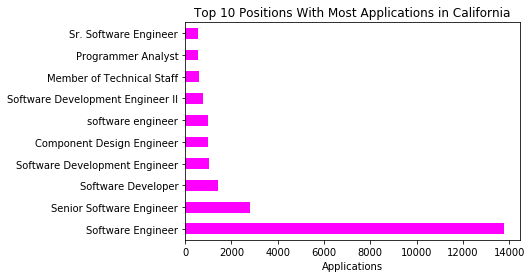

In [75]:
green_ca['JOB_INFO_JOB_TITLE'].value_counts()[:10].plot(kind='barh', rot=0, color="magenta")
plt.xlabel('Applications')
plt.title("Top 10 Positions With Most Applications in California")
plt.show()

Is it the same nation-wide? 

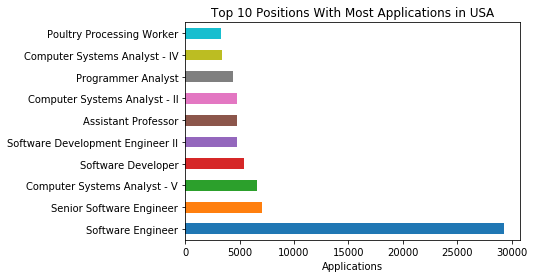

In [79]:
greencard['JOB_INFO_JOB_TITLE'].value_counts()[:10].plot(kind='barh', rot=0)
plt.xlabel('Applications')
plt.title("Top 10 Positions With Most Applications in USA")
plt.show()

We can see that the permanent residence applications inside USA are mostly for tech - software positions. This can show us that biggest tech companies gather the software engineers, developers and analysts from all around the world. It's also strange that Top 10 positions are all computer-tech positions.

Let's take a closer look at the graduation years in order to understand if the baby boomers or the fresh-graduates move to another country easily.

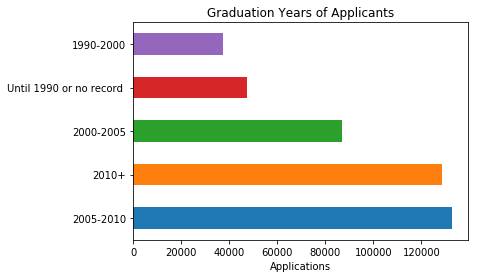

In [80]:
generation = []  #We distribute applicants' graduation years into sub-categories

for i in greencard['FW_INFO_YR_REL_EDU_COMPLETED']:
    if i > 2010:
        generation.append('2010+')
    elif i > 2005:
        generation.append('2005-2010')
    elif i > 2000:
        generation.append('2000-2005')
    elif i > 1990:
        generation.append('1990-2000')
    else:
        generation.append('Until 1990 or no record ')

greencard['generation'] = generation 
greencard['generation'].value_counts().plot(kind='barh', rot=0)
plt.xlabel('Applications')
plt.title("Graduation Years of Applicants")
plt.show()

This graph shows that the newly-grads and less experienceds are the ones who move to USA the most. 

Now have a look at the education level, are they mostly under-grads or do they have Master's Degree?

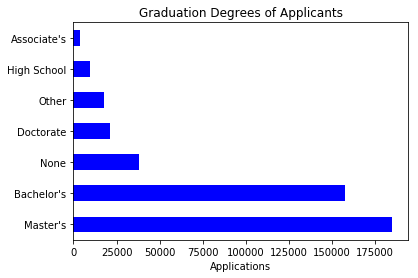

In [81]:
greencard['FOREIGN_WORKER_INFO_EDUCATION'].value_counts().plot(kind='barh', rot=0, color="blue")
plt.xlabel('Applications')
plt.title("Graduation Degrees of Applicants")
plt.show()

Master's Degree and Bachelor's Degree rule over them all significantly.

In the 2 graphs below, we will try to understand the applications' decisions. In which month the most applications are decided and their  decision status.

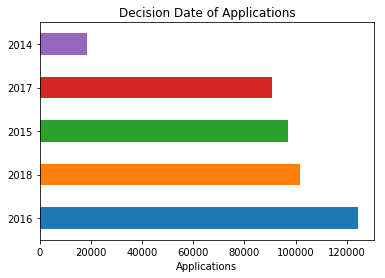

In [82]:
greencard['decision_month'] = pd.to_datetime(greencard['DECISION_DATE']).dt.to_period('Y') #We take only the month and year

greencard['decision_month'].value_counts().plot(kind='barh', rot=0)
plt.xlabel('Applications')
plt.title("Decision Date of Applications")
plt.show()

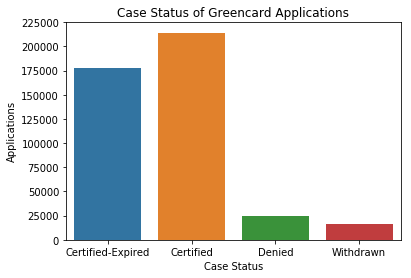

In [83]:
sns.countplot(x="CASE_STATUS", data=greencard )   
plt.xlabel('Case Status')
plt.ylabel('Applications')
plt.title("Case Status of Greencard Applications")
plt.show()

Are there any relationship about their application status and graduation degrees?

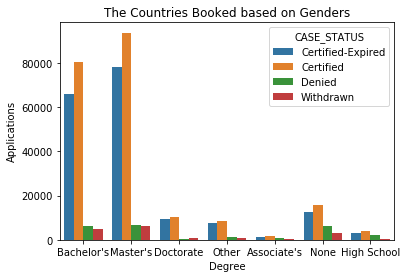

In [84]:
sns.countplot(x='FOREIGN_WORKER_INFO_EDUCATION', hue = 'CASE_STATUS',data=greencard[greencard['CASE_STATUS'] != 'NDF'])
plt.xlabel('Degree')
plt.ylabel('Applications')
plt.title('The Countries Booked based on Genders')
plt.show()

When compare the None-Degree applicants' "Denied" status with all other status, the comparison shows that people with "None-Degree" have a higher possibility to be denied for permanent residence application. 

# C. Conclusion

## Brain Drain

When I built on this analysis to identify the Permanent Residence application statistics in U.S.A., I did not think that the highly skilled brain drain could be seen this clear. The obvious thing is, USA gathers the high skilled tech-brains and strengthen the technology-software industry in their country to an inaccesible and unachiveable level.

While USA is gaining power in the high-tech skilled employees, countries like India, China, South Korea, Canada even UK are losing their talented citizens. The orientation to USA of Indian skilled immigrants is spectecularly high when we compare it to the populations with China (almost same populations but Indian skilled immigration is almost 7 times higher than Chinese).

On the other hand, it is apparent that even though the applicants are however-skilled, if they don't have degrees, their refusal possibility is much more higher than others. This indicates that USA takes degrees serious.

## Summary 

Mostly fresh graduates, with Bachelor's or Master's Degree who are into Software Development or Software Engineering are targets of high-tech companies like Google, Apple, Intel etc. This aim easily sums up why mostly the American companies dominate high-tech industry. Will another country be an opponent to USA? We will see. 

# D. References

[1] Green card & H1B applications https://www.kaggle.com/jonamjar/green-card-h1b-20142018